In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from jcopml.plot import plot_missing_value, plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler

In [4]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


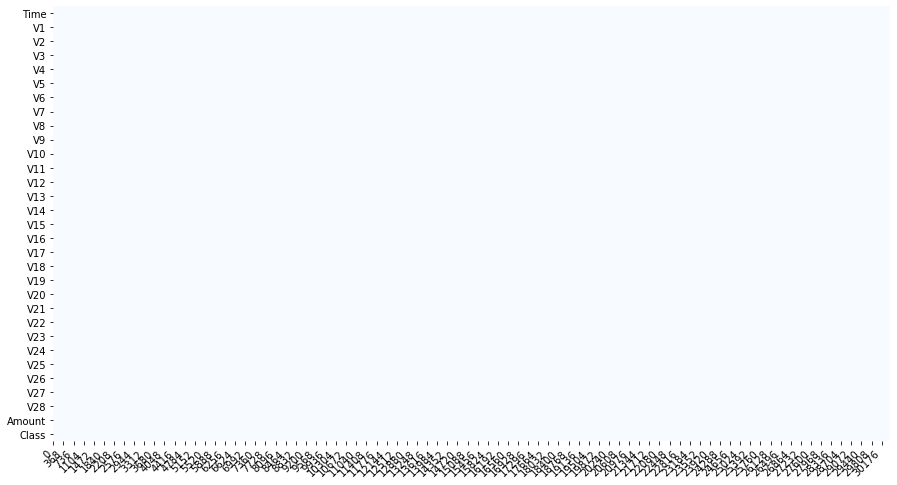

In [8]:
plot_missing_value(df)

In [11]:
X = df.drop(columns="Class")
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

In [16]:
numer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
prep = ColumnTransformer([
    ("numerik", numer, X_train.columns)])

In [27]:
pipeline = Pipeline([
    ("preprocessor", prep),
    ("algo", SVC())
])
adjiesvm = [{"algo__kernel" : ["linear"],
             "algo__C" :[0.01, 0.1, 1, 10]},
            {"algo__kernel" : ["radial"],
            "algo__gamma" : [0.001, 0.01, 0.1, 1, 10],
            "algo__C" :[0.01, 0.1, 1, 10]}
           ]

model = GridSearchCV(pipeline,cv=10, n_jobs=-1, scoring="f1", param_grid=adjiesvm)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerik',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                               

In [28]:
model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test)

(0.917098445595855, 0.9194707628938277, 0.934673366834171)

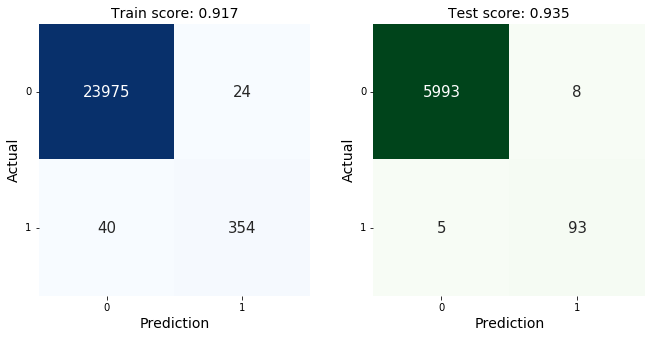

In [29]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [31]:
df.Class.value_counts()

0    30000
1      492
Name: Class, dtype: int64